In [186]:
import pandas as pd
from pysyncon import Dataprep, Synth
import random
import pickle
from sklearn.neighbors import KDTree

In [187]:
treated_unit = '1156007487'
treated_period = 2017
id_var = 'pidp'
time_var = 'year'
target_var = 'ind_inc_deflated'
df = pd.read_csv('./test_data.csv', index_col=0)
df['pidp'] = df['pidp'].astype(str)
t_u = df[df.pidp==treated_unit].copy()
c_u = df[df.pidp!=treated_unit].copy()
selection = random.sample(c_u.pidp.unique().tolist(), 500)
sample = df[df.pidp.isin(selection)]
data = pd.concat([sample,t_u], axis=0)

In [188]:
data

,year,pidp,asian,black,dvage,ind_inc_deflated,low,mastat_recoded,middle,mixed,other
0,2010.0,884029255,0.0,0.0,22.0,975.979710,1.0,0.0,0.0,0.0,0.0
1,2011.0,884029255,0.0,0.0,23.0,1194.095368,1.0,0.0,0.0,0.0,0.0
2,2012.0,884029255,0.0,0.0,24.0,1055.966209,1.0,0.0,0.0,0.0,0.0
3,2013.0,884029255,0.0,0.0,25.0,1230.769231,1.0,0.0,0.0,0.0,0.0
4,2014.0,884029255,0.0,0.0,26.0,1093.168472,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4351,2017.0,1156007487,0.0,0.0,49.0,1304.347826,0.0,1.0,0.0,0.0,0.0
4352,2018.0,1156007487,0.0,0.0,51.0,1593.252109,0.0,1.0,0.0,0.0,0.0
4353,2019.0,1156007487,0.0,0.0,51.0,1309.814792,0.0,1.0,0.0,0.0,0.0
4354,2020.0,1156007487,0.0,0.0,52.0,1895.331564,0.0,1.0,0.0,0.0,0.0


In [189]:
with open('data.pkl', 'rb') as file:
    data_object = pickle.load(file)

In [244]:
data = data_object['data'].copy()
ncol = data.shape[1] - 1
sample_weights = data_object['weight'].copy()
data.index.names = ['var', 'year']
t_time = data_object['treat_time']
target_var = data_object['target_var']
treated_unit = data_object['treat_id']
data.index = data.index.map(lambda idx: (idx[0], idx[1] - t_time))
sample_weights.index = sample_weights.index - t_time
data = data.sort_index(ascending=True).copy()
data = data.loc[(slice(None), slice(-5, 5)), :].copy()
#df_T0 = data.loc[pd.IndexSlice[:, :-1], :]
#kdt = KDTree(df_T0.T, leaf_size=30, metric='euclidean')
#idx = kdt.query(df_T0.T, k=50, return_distance=False)[0, :]
#data = data.iloc[:, idx]

In [245]:
data

pidp        1156007487  1225764607  1021210407  1360743931  1156711291  \
var   year                                                               
asian -5.0         0.0         1.0         0.0         1.0         0.0   
      -4.0         0.0         1.0         0.0         1.0         0.0   
      -3.0         0.0         1.0         0.0         1.0         0.0   
      -2.0         0.0         1.0         0.0         1.0         0.0   
      -1.0         0.0         1.0         0.0         1.0         0.0   
...                ...         ...         ...         ...         ...   
other  0.0         0.0         0.0         0.0         0.0         0.0   
       1.0         0.0         0.0         0.0         0.0         0.0   
       2.0         0.0         0.0         0.0         0.0         0.0   
       3.0         0.0         0.0         0.0         0.0         0.0   
       4.0         0.0         0.0         0.0         0.0         0.0   

pidp        884299207   1224193807  884320971   1632789487  1360705847  ...  \
var   year                                                              ...   
asian -5.0         0.0         0.0         0.0         0.0         0.0  ...   
      -4.0         0.0         0.0         0.0         0.0         0.0  ...   
      -3.0         0.0         0.0         0.0         0.0         0.0  ...   
      -2.0         0.0         0.0         0.0         0.0         0.0  ...   
      -1.0         0.0         0.0         0.0         0.0         0.0  ...   
...                ...         ...         ...         ...         ...  ...   
other  0.0         0.0         0.0         0.0         0.0         0.0  ...   
       1.0         0.0         0.0         0.0         0.0         0.0  ...   
       2.0         0.0         0.0         0.0         0.0         0.0  ...   
       3.0         0.0         0.0         0.0         0.0         0.0  ...   
       4.0         0.0         0.0         0.0         0.0         0.0  ...   

pidp        1360354971  1632760927  1021205647  1088453571  1564573251  \
var   year                                                               
asian -5.0         0.0         0.0         0.0         0.0         0.0   
      -4.0         0.0         0.0         0.0         0.0         0.0   
      -3.0         0.0         0.0         0.0         0.0         0.0   
      -2.0         0.0         0.0         0.0         0.0         0.0   
      -1.0         0.0         0.0         0.0         0.0         0.0   
...                ...         ...         ...         ...         ...   
other  0.0         0.0         0.0         0.0         0.0         0.0   
       1.0         0.0         0.0         0.0         0.0         0.0   
       2.0         0.0         0.0         0.0         0.0         0.0   
       3.0         0.0         0.0         0.0         0.0         0.0   
       4.0         0.0         0.0         0.0         0.0         0.0   

pidp        884376727   884278131   952680699   1564138731  1088059855  
var   year                                                              
asian -5.0         0.0         0.0         0.0         0.0         0.0  
      -4.0         0.0         0.0         0.0         0.0         0.0  
      -3.0         0.0         0.0         0.0         0.0         0.0  
      -2.0         0.0         0.0         0.0         0.0         0.0  
      -1.0         0.0         0.0         0.0         0.0         0.0  
...                ...         ...         ...         ...         ...  
other  0.0         0.0         0.0         0.0         0.0         0.0  
       1.0         0.0         0.0         0.0         0.0         0.0  
       2.0         0.0         0.0         0.0         0.0         0.0  
       3.0         0.0         0.0         0.0         0.0         0.0  
       4.0         0.0         0.0         0.0         0.0         0.0  

[90 rows x 50 columns]

In [246]:
melted_df = data.reset_index().melt(id_vars=['var', 'year'], var_name='pidp')
pivoted_df = melted_df.pivot(index=['year', 'pidp'], columns='var', values='value').reset_index()
pivoted_df =pivoted_df.sort_values(by=['pidp', 'year'])
pivoted_df = pivoted_df.reset_index(drop=True)
pivoted_df.columns.name = ''
pivoted_df

/tmp/ipykernel_4569/4236230611.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivoted_df = melted_df.pivot(index=['year', 'pidp'], columns='var', values='value').reset_index()


,year,pidp,asian,black,dvage,ind_inc_deflated,low,mastat_recoded,middle,mixed,other
0,-5.0,884029255,0.0,0.0,24.0,1055.966209,1.0,0.0,0.0,0.0,0.0
1,-4.0,884029255,0.0,0.0,25.0,1230.769231,1.0,0.0,0.0,0.0,0.0
2,-3.0,884029255,0.0,0.0,26.0,1093.168472,1.0,0.0,0.0,0.0,0.0
3,-2.0,884029255,0.0,0.0,27.0,1305.220884,1.0,0.0,0.0,0.0,0.0
4,-1.0,884029255,0.0,0.0,28.0,1298.701299,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
495,0.0,1633244407,0.0,0.0,47.0,1660.952381,1.0,0.0,0.0,0.0,0.0
496,1.0,1633244407,0.0,0.0,48.0,1202.993452,1.0,0.0,0.0,0.0,0.0
497,2.0,1633244407,0.0,0.0,49.0,1375.807941,1.0,0.0,0.0,0.0,0.0
498,3.0,1633244407,0.0,0.0,50.0,1374.885426,1.0,0.0,0.0,0.0,0.0


In [280]:
covariates = pivoted_df.columns.to_list()
covariates.remove('year')
covariates.remove('pidp')
covariates

['asian',
 'black',
 'dvage',
 'ind_inc_deflated',
 'low',
 'mastat_recoded',
 'middle',
 'mixed',
 'other']

In [247]:
controls = pivoted_df.pidp[pivoted_df.pidp!=treated_unit].unique()

In [282]:
dataprep = Dataprep(
    foo=pivoted_df,
    predictors=['ind_inc_deflated', 'asian', 'black', 'dvage', 'low', 'mastat_recoded', 'middle', 'mixed', 'other'],
    predictors_op="mean",
    time_predictors_prior=range(-5, 0),
    dependent="ind_inc_deflated",
    unit_variable="pidp",
    time_variable="year",
    treatment_identifier=treated_unit,
    controls_identifier=controls,
    time_optimize_ssr=range(-5, 0),
)


In [283]:
def sc(x):
    data = data_object['data'].copy()
    ncol = data.shape[1] - 1
    sample_weights = data_object['weight'].copy()
    data.index.names = ['var', 'year']
    t_time = data_object['treat_time']
    target_var = data_object['target_var']
    treated_unit = data_object['treat_id']
    data.index = data.index.map(lambda idx: (idx[0], idx[1] - t_time))
    sample_weights.index = sample_weights.index - t_time
    data = data.sort_index(ascending=True).copy()
    data = data.loc[(slice(None), slice(-5, 5)), :].copy()
    melted_df = data.reset_index().melt(id_vars=['var', 'year'], var_name='pidp')
    pivoted_df = melted_df.pivot(index=['year', 'pidp'], columns='var', values='value').reset_index()
    pivoted_df =pivoted_df.sort_values(by=['pidp', 'year'])
    pivoted_df = pivoted_df.reset_index(drop=True)
    pivoted_df.columns.name = ''
    covariates = pivoted_df.columns.to_list()
    covariates.remove('year')
    covariates.remove('pidp')
    dataprep = Dataprep(
        foo=pivoted_df,
        predictors=covariates,
        predictors_op="mean",
        time_predictors_prior=range(-5, 0),
        dependent=target_var,
        unit_variable="pidp",
        time_variable="year",
        treatment_identifier=treated_unit,
        controls_identifier=controls,
        time_optimize_ssr=range(-5, 0),
    )


    #synth = data.iloc[:, idx].dot(weights).loc[target_var] # synthetic control is now based on the new subset of observations
    #treated = data.iloc[:, 0].loc[target_var]
    #diff = treated - synth
    #weighted_diff = sample_weights.multiply(diff, axis=0)['weight_yearx']
    #return {
    #    'synth': synth,
    #    'treated': treated,
    #    'diff': diff,
    #    'weighted_diff': weighted_diff
    #     }

In [250]:
synth = Synth()
synth.fit(dataprep=dataprep, custom_V=[.4, .75, .75, .75, .75, .75, .75, .75, .75])

In [251]:
synth.summary()

,V,treated,synthetic,sample mean
,,,,
ind_inc_deflated,0.40,1302.327,1275.230,1275.230
asian,0.75,0.000,0.122,0.122
black,0.75,0.000,0.020,0.020
dvage,0.75,46.000,43.465,43.465
low,0.75,0.000,0.408,0.408
mastat_recoded,0.75,1.000,0.649,0.649
middle,0.75,0.000,0.318,0.318
mixed,0.75,0.000,0.000,0.000
other,0.75,0.000,0.000,0.000


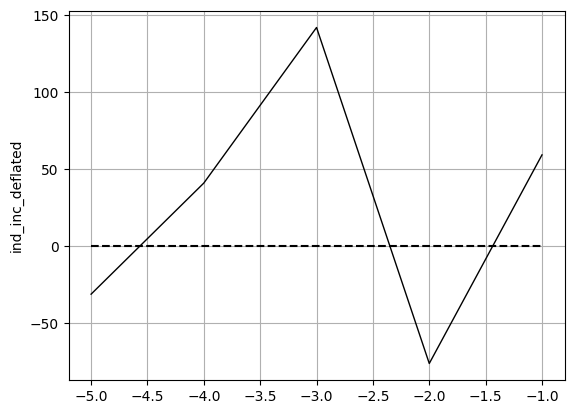

In [252]:
synth.gaps_plot()